In [ ]:
from base_rbt.base_model import *
from base_rbt.base_lf import *
from base_rbt.base_linear import *
from base_rbt.helper import *

In [ ]:
import self_supervised
import torch
from fastai.vision.all import *
from self_supervised.augmentations import *
from self_supervised.layers import *

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#data: dls, dls_val, dls_test
#get the data: Need dls, dls_val, dls_test

size=32
seed=42
path = untar_data(URLs.CIFAR)
fnames = get_image_files(path / "train")
fnames.sort()
#shuffle data (in reproducible way)
seed_everything(seed=seed)
fnames = fnames.shuffle()

#fnames for train, eval and test
fnames = fnames[0:20]


def label_func(fname):
    return fname.name.split('_')[1].strip('png').strip('.')

#labels for train,eval and test
labels = [label_func(fname) for fname in fnames]

#Used for training encoder i.e. BT
dls = ImageDataLoaders.from_lists(path, fnames, labels,bs=20, item_tfms=[Resize(size=32)], #batch_tfms=[ToTensor(), IntToFloatTensor()],
                                  valid_pct=0.0,num_workers=12,device=device,seed=seed)

set(labels) #Check that the labels make sense

{'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck'}

In [ ]:
x,y=dls.train.one_batch()
print(x.sum())

TensorImage(30403.1016)


In [ ]:
aug_pipelines_1 = get_barlow_twins_aug_pipelines(s1=100,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=True,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=1.0,sol_p=0.0,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines_2 = get_barlow_twins_aug_pipelines(s1=100,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=False,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,sol_t=0.01,sol_a=0.01,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=0.001,sol_p=0.2,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

Pipeline: RandomGaussianBlur -- {'p': 1.0, 'prob': 1.0, 's': 5, 's1': 100, 'same_on_batch': False} -> Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}
Pipeline: Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}


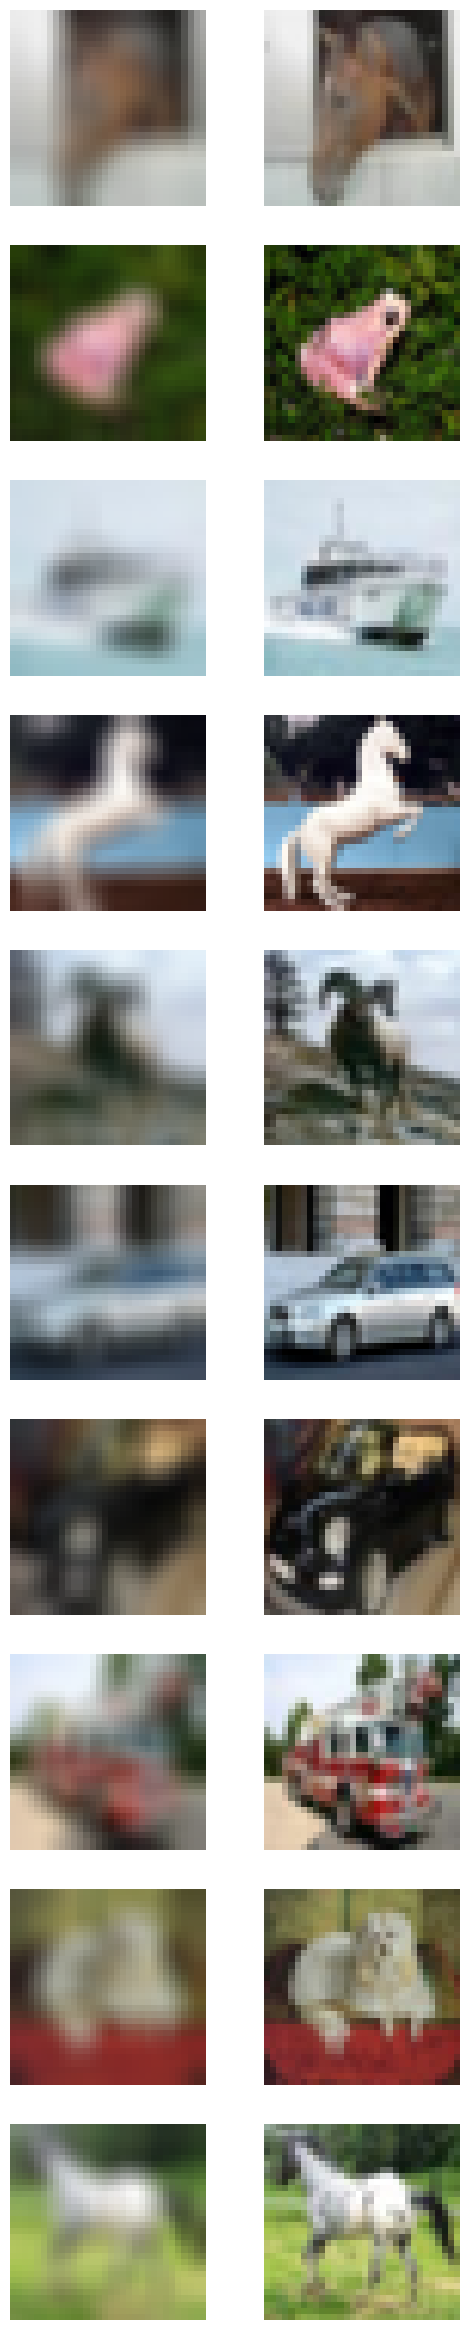

In [ ]:
show_bt_batch(dls=dls,n_in=3,aug=aug_pipelines,n=10,print_augs=True)

Pipeline: RandomGaussianBlur -- {'p': 1.0, 'prob': 1.0, 's': 5, 's1': 0.1, 'same_on_batch': False} -> Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}
Pipeline: Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}


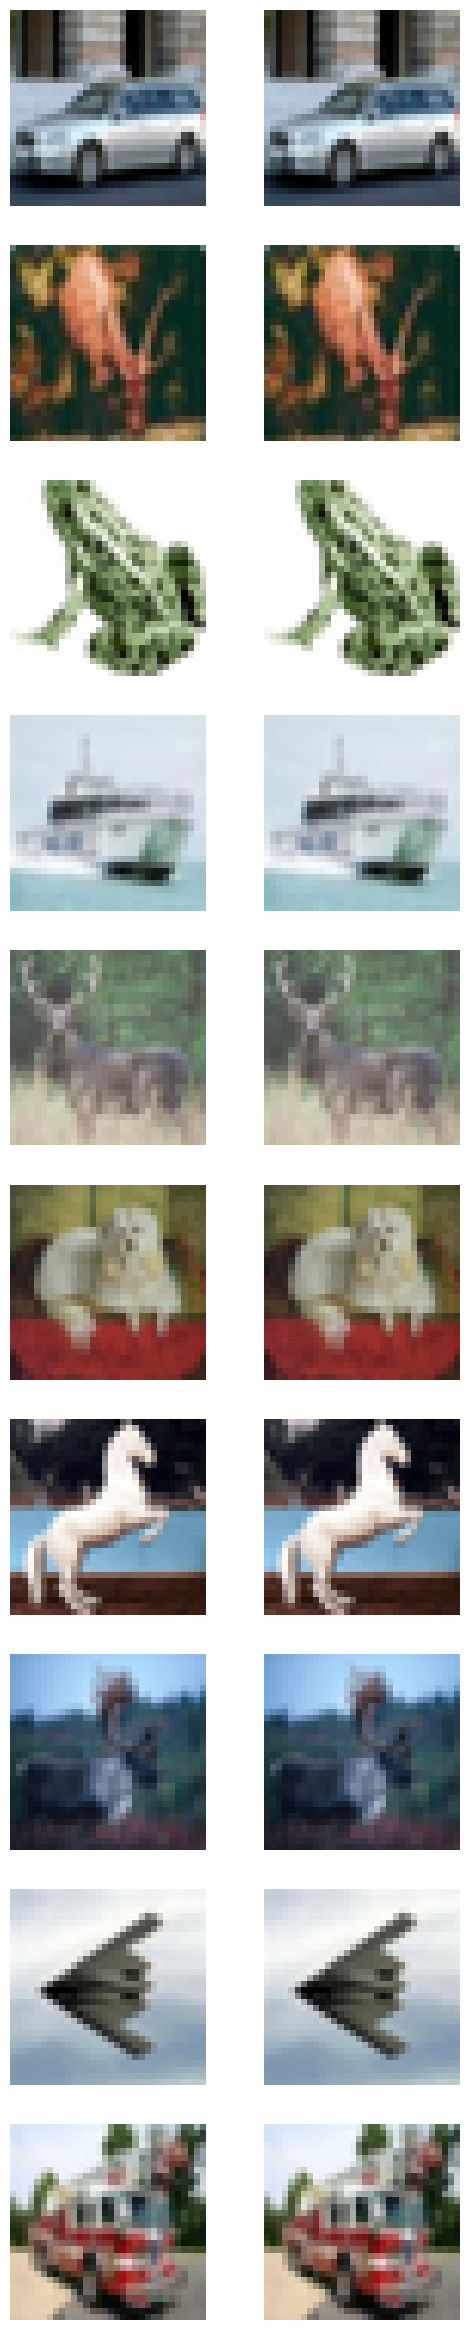

In [ ]:
aug_pipelines_1 = get_barlow_twins_aug_pipelines(s1=0.1,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=True,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=1.0,sol_p=0.0,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines_2 = get_barlow_twins_aug_pipelines(s1=0.1,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=False,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,sol_t=0.01,sol_a=0.01,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=0.001,sol_p=0.2,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

show_bt_batch(dls=dls,n_in=3,aug=aug_pipelines,n=10,print_augs=True)

Pipeline: RandomGaussianBlur -- {'p': 1.0, 'prob': 1.0, 's': 5, 's1': 2.0, 'same_on_batch': False} -> Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}
Pipeline: Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}


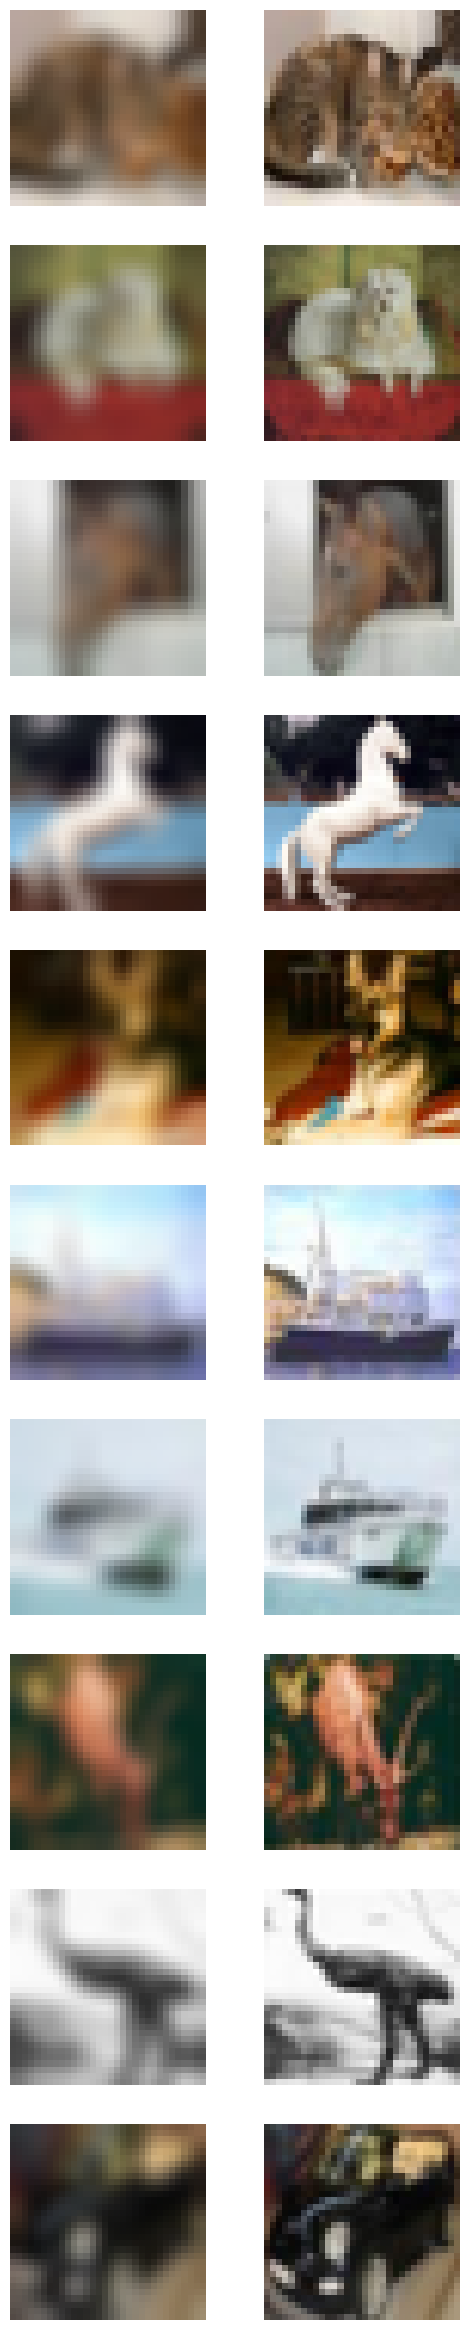

In [ ]:
aug_pipelines_1 = get_barlow_twins_aug_pipelines(s1=2.0,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=True,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=1.0,sol_p=0.0,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines_2 = get_barlow_twins_aug_pipelines(s1=2.0,size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=False,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,sol_t=0.01,sol_a=0.01,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=0.001,sol_p=0.2,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

show_bt_batch(dls=dls,n_in=3,aug=aug_pipelines,n=10,print_augs=True)

Pipeline: RandomGaussianBlur -- {'p': 1.0, 'prob': 1.0, 's': 5, 's1': None, 'same_on_batch': False} -> Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}
Pipeline: Normalize -- {'mean': tensor([[[[0.4910]],

         [[0.4820]],

         [[0.4470]]]]), 'std': tensor([[[[0.2470]],

         [[0.2430]],

         [[0.2610]]]]), 'axes': (0, 2, 3)}


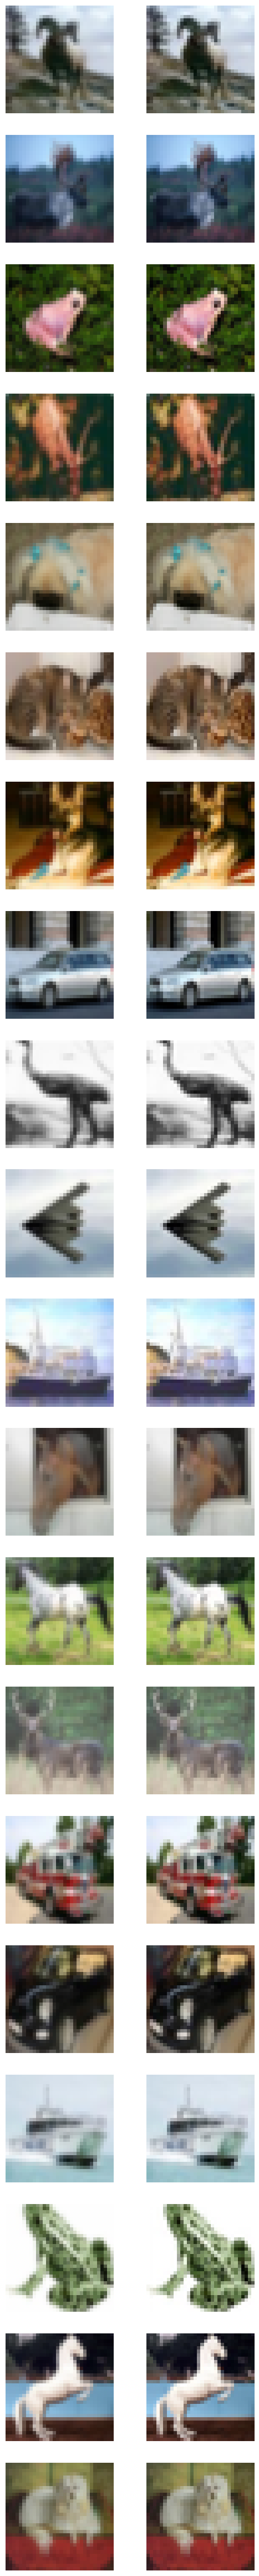

In [ ]:
aug_pipelines_1 = get_barlow_twins_aug_pipelines(size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=True,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=1.0,sol_p=0.0,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines_2 = get_barlow_twins_aug_pipelines(size=size,
                                                 flip=False,crop=False,bw=False, rotate=False,noise=False, jitter=False, blur=False,solar=False,
                                                 resize_scale=(0.4, 1.0),rotate_deg=45,noise_std=0.0125, jitter_s=1.0, blur_s=math.ceil(size/10)+1,sol_t=0.01,sol_a=0.01,
                                                 bw_p=0.2, flip_p=0.5,rotate_p=0.25,noise_p=0.5, jitter_p=0.5, blur_p=0.001,sol_p=0.2,
                                                 stats=cifar_stats,same_on_batch=False, xtra_tfms=[]
                                                 )

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

aug_pipelines = [aug_pipelines_1,aug_pipelines_2]

show_bt_batch(dls=dls,n_in=3,aug=aug_pipelines,n=20,print_augs=True)